<a href="https://colab.research.google.com/github/uk1618/Human_Action_Recognition/blob/main/HAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kütüphanelerin Eklenmesi

In [ ]:
import os
import glob
import random
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

from tqdm import tqdm

from PIL import Image

from tensorflow.keras.utils import to_categorical

import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt

# Verisetinin indirilmesi

In [ ]:
!pip install -q kaggle

In [ ]:
!kaggle datasets download -d meetnagadia/human-action-recognition-har-dataset

Dataset URL: https://www.kaggle.com/datasets/meetnagadia/human-action-recognition-har-dataset
License(s): ODbL-1.0
 97% 289M/297M [00:05<00:00, 29.0MB/s]
100% 297M/297M [00:05<00:00, 53.9MB/s]


In [ ]:
!unzip /content/human-action-recognition-har-dataset.zip -d dataset

Archive:  /content/human-action-recognition-har-dataset.zip
replace dataset/Human Action Recognition/Testing_set.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Verisetinin ayrıştırılması

In [ ]:
train_data = pd.read_csv("/content/dataset/Human Action Recognition/Training_set.csv")
test_data = pd.read_csv("/content/dataset/Human Action Recognition/Testing_set.csv")

In [ ]:
train_fol = glob.glob("/content/dataset/Human Action Recognition/train/*")
test_fol = glob.glob("/content/dataset/Human Action Recognition/test/*")

# Verisetinin incelenmesi

In [ ]:
train_data

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop
...,...,...
12595,Image_12596.jpg,sitting
12596,Image_12597.jpg,clapping
12597,Image_12598.jpg,sitting
12598,Image_12599.jpg,dancing


In [ ]:
train_data.label.value_counts()

label
sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: count, dtype: int64

In [ ]:
import plotly.express as px
HAR = train_data.label.value_counts()
fig = px.pie(train_data, values=HAR.values, names=HAR.index, title='İnsan Davranışların Dağılımı')
fig.show()

In [ ]:
filename = train_data['filename']
situation = train_data['label']

In [ ]:
filename

0            Image_1.jpg
1            Image_2.jpg
2            Image_3.jpg
3            Image_4.jpg
4            Image_5.jpg
              ...       
12595    Image_12596.jpg
12596    Image_12597.jpg
12597    Image_12598.jpg
12598    Image_12599.jpg
12599    Image_12600.jpg
Name: filename, Length: 12600, dtype: object

# Rastgele görsellerin incelenmesi


In [ ]:
def displaying_random_images():
    num = random.randint(1,10000)
    imgg = "Image_{}.jpg".format(num)
    train = "/content/dataset/Human Action Recognition/train/"
    if os.path.exists(train+imgg):
        testImage = img.imread(train+imgg)
        plt.imshow(testImage)
        plt.title("{}".format(train_data.loc[train_data['filename'] == "{}".format(imgg), 'label'].item()))

    else:
        #print(train+img)
        print("File Path not found \nSkipping the file!!")


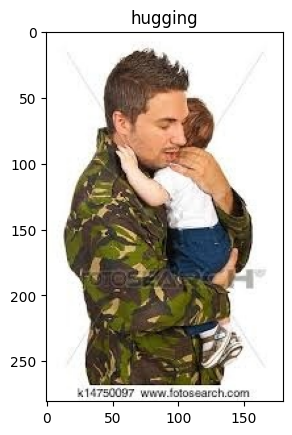

In [ ]:
displaying_random_images()

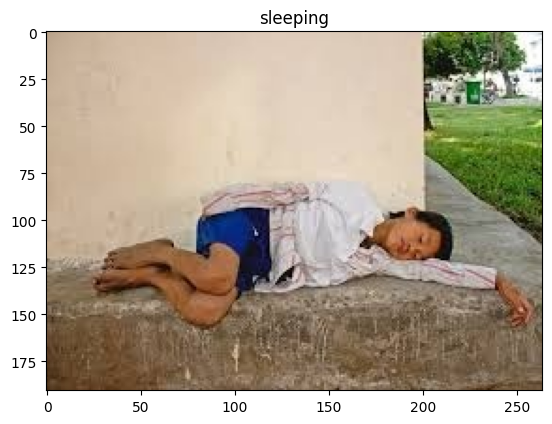

In [ ]:
displaying_random_images()

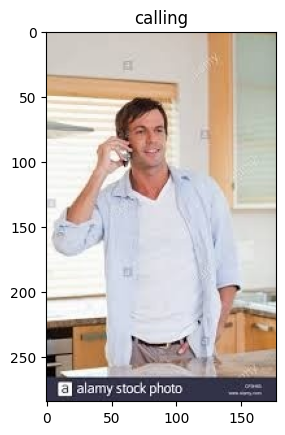

In [ ]:
displaying_random_images()

# Verilerin işlenmesi

In [ ]:
img_data = []
img_label = []
length = len(train_fol)
for i in (range(len(train_fol)-1)):
    t = '/content/dataset/Human Action Recognition/train/' + filename[i]
    temp_img = Image.open(t)
    img_data.append(np.asarray(temp_img.resize((160,160))))
    img_label.append(situation[i])



In [ ]:
img_shape = (160,160,3)

In [ ]:
iii = img_data
iii = np.asarray(iii)
type(iii)

numpy.ndarray

In [ ]:
y_train = to_categorical(np.asarray(train_data["label"].factorize()[0]))
print(y_train[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# CNN Model Oluşturma

In [ ]:
efficientnet_model = Sequential()

model = tf.keras.applications.EfficientNetB7(include_top=False,
                                            input_shape=(160,160,3),
                                            pooling ="avg",classes=15,
                                             weights="imagenet")

for layer in model.layers:
    layer.trainable=False


efficientnet_model.add(model)
efficientnet_model.add(Flatten())
efficientnet_model.add(Dense(512,activation="relu"))
efficientnet_model.add(Dense(15,activation="softmax"))

258076736/258076736 [==============================] - 2s 0us/step


In [ ]:
efficientnet_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
efficientnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional  (None, 2560)              64097687  
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2560)              0         
                                                                 
 dense (Dense)               (None, 512)               1311232   
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 65416614 (249.54 MB)
Trainable params: 1318927 (5.03 MB)
Non-trainable params: 64097687 (244.51 MB)
_________________________________________________________________


# Modelin eğitilmesi

In [ ]:
history = efficientnet_model.fit(iii,y_train,epochs=40)

Epoch 1/40
394/394 [==============================] - 100s 182ms/step - loss: 1.2623 - accuracy: 0.6011
Epoch 2/40
394/394 [==============================] - 73s 186ms/step - loss: 0.8759 - accuracy: 0.7163
Epoch 3/40
394/394 [==============================] - 74s 188ms/step - loss: 0.6509 - accuracy: 0.7874
Epoch 4/40
394/394 [==============================] - 75s 189ms/step - loss: 0.4773 - accuracy: 0.8456
Epoch 5/40
394/394 [==============================] - 74s 189ms/step - loss: 0.3335 - accuracy: 0.8947
Epoch 6/40
394/394 [==============================] - 75s 190ms/step - loss: 0.2401 - accuracy: 0.9260
Epoch 7/40
394/394 [==============================] - 74s 189ms/step - loss: 0.1795 - accuracy: 0.9434
Epoch 8/40
394/394 [==============================] - 75s 190ms/step - loss: 0.1374 - accuracy: 0.9582
Epoch 9/40
394/394 [==============================] - 74s 188ms/step - loss: 0.1198 - accuracy: 0.9674
Epoch 10/40
394/394 [==============================] - 74s 189ms/step - 

Eğitilen modelin Acc-Loss değerleri

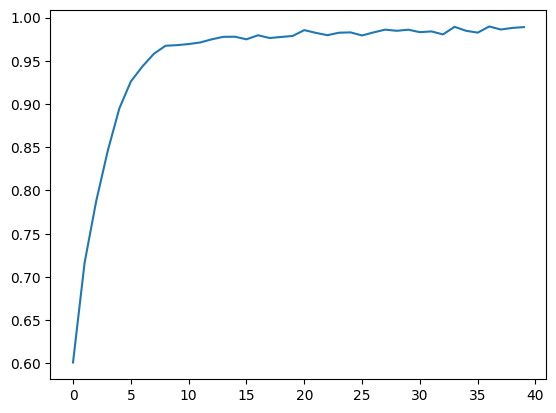

In [ ]:
acc = history.history['accuracy']
plt.plot(acc)

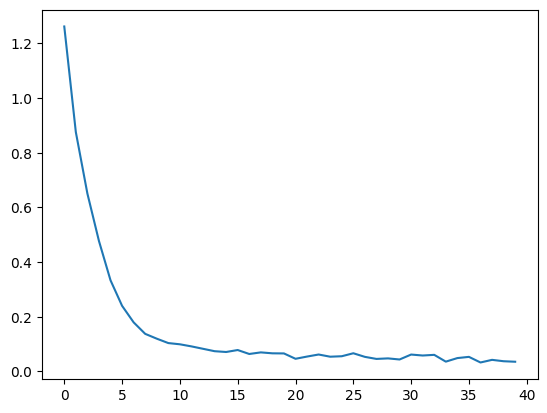

In [ ]:
losses = history.history["loss"]
plt.plot(losses)

# Modelin test edilmesi (Predictions)

In [ ]:
from PIL import Image
def read_img(fn):
    img = Image.open(fn)
    return np.asarray(img.resize((160,160)))

In [ ]:
def test_predict(test_image):
    result = efficientnet_model.predict(np.asarray([read_img(test_image)]))

    itemindex = np.where(result==np.max(result))
    prediction = itemindex[1][0]
    print("probability: "+str(np.max(result)*100) + "%\nPredicted class : ", prediction)

    image = img.imread(test_image)
    plt.imshow(image)
    plt.title(prediction)

1/1 [==============================] - 0s 46ms/step
probability: 99.99935626983643%
Predicted class :  11


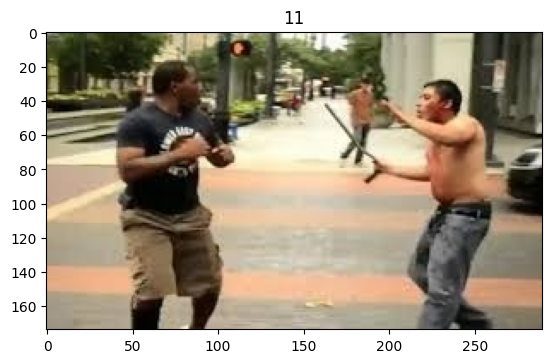

In [ ]:
test_predict("/content/dataset/Human Action Recognition/train/Image_11767.jpg")

# Modelin dışarıya çıkarılması

In [ ]:
from tensorflow.keras.models import save_model

efficientnet_model.save("Human_Action_Recognition.keras")

# Modelin kullanılması

In [ ]:
from tensorflow.keras.models import load_model


loaded_model = load_model("/content/drive/MyDrive/ai/projects/Human Action Recognition/Human_Action_Recognition.keras")

In [ ]:
class_names = {
    1: "using_laptop",
    2: "hugging",
    3: "sleeping",
    4: "drinking",
    5: "clapping",
    6: "dancing",
    7: "cycling",
    8: "calling",
    9: "laughing",
    10: "eating",
    11: "fighting",
    12: "listening_to_music",
    13: "running",
    14: "texting"
}


In [ ]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
def test_predict_with_model(test_image):
    result = loaded_model.predict(np.asarray([read_img(test_image)]))

    itemindex = np.where(result==np.max(result))
    prediction = itemindex[1][0]
    print("probability: "+str(np.max(result)*100) + "%\nPredicted class : ", class_names[prediction])

    image = img.imread(test_image)
    plt.imshow(image)
    plt.title(class_names[prediction])

1/1 [==============================] - 0s 43ms/step
probability: 100.0%
Predicted class :  drinking


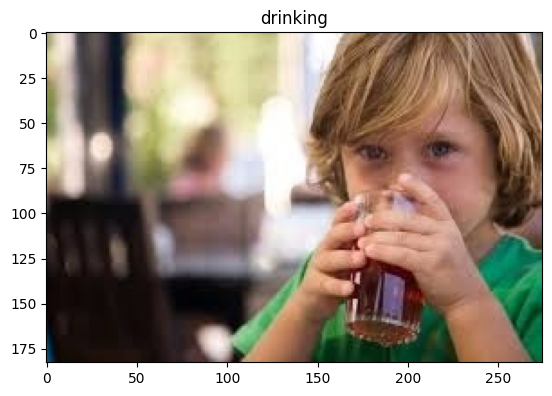

In [ ]:
test_predict_with_model("/content/drive/MyDrive/ai/datasets/Human Action Recognition/test/Image_10.jpg")

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0
